### Classification Project: Consumer Complaint Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 9999 non-null   object
 1   Product                       9999 non-null   object
 2   Sub-product                   6946 non-null   object
 3   Issue                         9999 non-null   object
 4   Sub-issue                     4152 non-null   object
 5   Consumer Complaint            2114 non-null   object
 6   Company Public Response       2694 non-null   object
 7   Company                       9999 non-null   object
 8   State                         9913 non-null   object
 9   ZIP code                      9913 non-null   object
 10  Tags                          1411 non-null   object
 11  Consumer consent provided?    4005 non-null   object
 12  Submitted via                 9999 non-null   object
 13  Date Sent to Compa

In [4]:
df.shape

(9999, 18)

In [5]:
df.rename(columns={"Date received" : "Date_received",
                   "Company Public Response" : "Company_Public_Response",
                   "Consumer Complaint" : "Consumer_Complaint",
                  "Consumer consent provided?" : "Consumer_consent_provided?",
                  "Submitted via" : "Submitted_via",
                  "Date Sent to Company" : "Date_Sent_to_Company",
                  "Company Response to Consumer" : "Company_Response_to_Consumer",
                  "Timely response?" : "Timely_response?" ,
                  "Consumer disputed?" : "Consumer_disputed?",
                  "Complaint ID" : "Complaint_ID",
                  "ZIP code" : "ZIP_code"}, inplace = True)

In [6]:
df.isna().sum()

Date_received                      0
Product                            0
Sub-product                     3053
Issue                              0
Sub-issue                       5847
Consumer_Complaint              7885
Company_Public_Response         7305
Company                            0
State                             86
ZIP_code                          86
Tags                            8588
Consumer_consent_provided?      5994
Submitted_via                      0
Date_Sent_to_Company               0
Company_Response_to_Consumer       0
Timely_response?                   0
Consumer_disputed?               156
Complaint_ID                       0
dtype: int64

In [7]:
df = df[pd.notnull(df['Consumer_Complaint'])]

factorize() is a Pandas method that helps you to quickly transform your data from text to numbers. Many times we need to transform a given variable to numbers, specially before presenting to certain algorithms that require only numeric entries

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [9]:
df.head()

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer_Complaint,Company_Public_Response,Company,State,ZIP_code,Tags,Consumer_consent_provided?,Submitted_via,Date_Sent_to_Company,Company_Response_to_Consumer,Timely_response?,Consumer_disputed?,Complaint_ID,category_id
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773,0
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100,1
7,6/15/15,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,6/15/15,Closed with explanation,Yes,No,1420702,0
12,2/3/16,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,2/3/16,Closed with explanation,Yes,Yes,1772196,2
16,2/17/16,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,3/4/16,Closed with explanation,Yes,Yes,1790634,2


In [10]:
cat_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [11]:
cat_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [12]:
dict(cat_id_df.values)

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15}

In [13]:
cat_id_df[['category_id','Product']]

,category_id,Product
1,0,Credit reporting
2,1,Consumer Loan
12,2,Debt collection
25,3,Mortgage
36,4,Credit card
90,5,Other financial service
124,6,Bank account or service
152,7,Student loan
168,8,Money transfers
538,9,Payday loan


In [14]:
to_cat = dict(cat_id_df[['category_id','Product']].values)
to_cat

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card'}

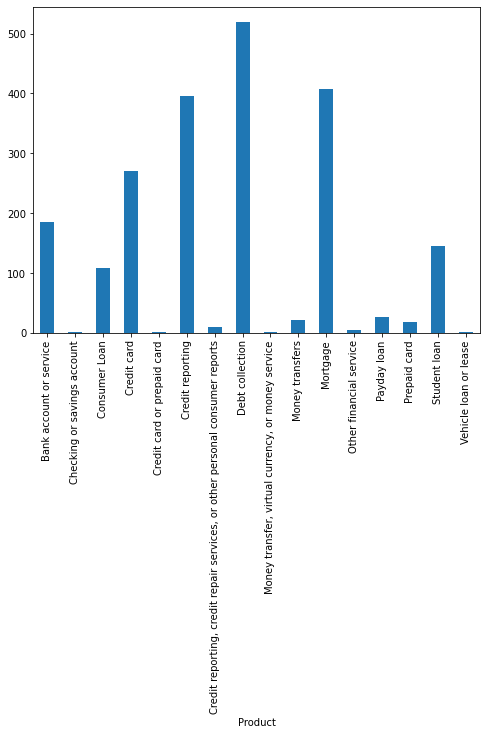

In [15]:
fig = plt.figure(figsize= (8,6))
df.groupby('Product').Consumer_Complaint.count().plot.bar();

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features)

In [18]:
features = tfidf.fit_transform(df.Consumer_Complaint).toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03423231, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05861387, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
lables = df.category_id
lables

1       0
2       1
7       0
12      2
16      2
       ..
9987    0
9988    3
9990    2
9994    3
9998    3
Name: category_id, Length: 2114, dtype: int64

In [20]:
lables.shape, features.shape

((2114,), (2114, 6081))

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df["Consumer_Complaint"], df["Product"])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
count_vect = CountVectorizer()
X_train_count =count_vect.fit_transform(X_train)

In [25]:
tfidf_transformer = TfidfTransformer()
X_train_tfdif = tfidf_transformer.fit_transform(X_train_count)

------------------------------------------------------

### Modeling

In [26]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [27]:
svc = LinearSVC()
svc.fit(X_train_tfdif, y_train)

LinearSVC()

In [28]:
print(svc.predict(count_vect.transform(['I have outdated on my credit repor'])))

['Credit card']


In [29]:
y_pred = svc.predict(count_vect.transform(X_test))

In [30]:
print(metrics.classification_report(y_test, y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.63      0.71      0.67        41
                                                               Consumer Loan       0.52      0.48      0.50        33
                                                                 Credit card       0.72      0.85      0.78        59
                                                            Credit reporting       0.65      0.93      0.77        96
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         3
                                                             Debt collection       0.81      0.64      0.72       128
                          Money transfer, virtual currency, or money service       0.00      0.00      0.00         1
                                                       

D:\Programmes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LinearSVC())])

In [32]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [33]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [34]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

D:\Programmes\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.8006309148264984


----------------------------------------------------------

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',DecisionTreeClassifier())])

In [37]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [38]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [39]:
y_pred=text_clf.predict(X_test)

In [40]:
print(metrics.classification_report(y_test, y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.47      0.46      0.47        41
                                                               Consumer Loan       0.36      0.36      0.36        33
                                                                 Credit card       0.65      0.66      0.66        59
                                                            Credit reporting       0.73      0.72      0.72        96
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         3
                                                             Debt collection       0.69      0.79      0.73       128
                          Money transfer, virtual currency, or money service       0.00      0.00      0.00         1
                                                       

D:\Programmes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programmes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

D:\Programmes\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.6126182965299684


-------------------------------------------------------

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',RandomForestClassifier())])

In [44]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', RandomForestClassifier())])

In [45]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [46]:
y_pred = text_clf.predict(X_test)

In [47]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.74      0.63      0.68        41
                                                               Consumer Loan       0.67      0.12      0.21        33
                                                                 Credit card       0.70      0.80      0.75        59
                                                            Credit reporting       0.75      0.79      0.77        96
Credit reporting, credit repair services, or other personal consumer reports       1.00      0.33      0.50         3
                                                             Debt collection       0.68      0.88      0.76       128
                          Money transfer, virtual currency, or money service       0.00      0.00      0.00         1
                                                       

D:\Programmes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

D:\Programmes\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [49]:
print(np.mean(cv_results))

0.7476340694006309


----------------------------------------------------------

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [58]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
model = RandomForestClassifier()

In [64]:
# Use the random grid to search for best hyperparameters
model=RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5,n_jobs=-1)

In [69]:
model.fit(X_train_tfdif, y_train)

D:\Programmes\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [72]:
model.best_params_

{'n_estimators': 800,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [73]:
model.best_score_

0.7280757097791798